In [2]:
%load_ext autoreload
%autoreload 2

In [6]:
from globalVariables import *
import simpleCNNwithInception as inceptionCNN
import simpleCNN as simpleCNN
import simpleCNNwithInceptionRegression as regressor
from keras.callbacks import CSVLogger
from scipy.ndimage import rotate
from tools import plot_confusion_matrix

#### 1. Fiducial, all four models

In [ ]:
train, test = get_tf_DataSet(augment_data=True, channels=['total','stellar'])
dataset_to_numpy = list(train.as_numpy_iterator())
inputShape = dataset_to_numpy[0][0].shape[1:]
fiducial = simpleCNN.getModel(inputShape, train.num_classes, nAttributes=0)
epochs=40
au_history = fiducial.fit(
  x=train,
    validation_data=test,
  epochs=epochs
)

In [ ]:
train, test = get_tf_DataSet( augment_data=True, channels=['total','stellar','xray'], 
                             correlations=[['total','stellar'],['total','xray'],['xray','stellar']],
                            attributes=['redshift','mass'])


In [5]:
dataset_to_numpy = list(train.as_numpy_iterator())
inputShape = dataset_to_numpy[0][0][0].shape[1:]
add_all = simpleCNN.getModel(inputShape, train.num_classes, nAttributes=2)
epochs=20
au_history = add_all.fit(
  x=train,
    validation_data=test,
  epochs=epochs
)

Epoch 1/20
120/120 [==============================] - 13s 102ms/step - loss: 1.2820 - accuracy: 0.3711 - val_loss: 1.1576 - val_accuracy: 0.4546
Epoch 2/20
120/120 [==============================] - 11s 94ms/step - loss: 1.1456 - accuracy: 0.4682 - val_loss: 1.1071 - val_accuracy: 0.4776
Epoch 3/20
120/120 [==============================] - 11s 94ms/step - loss: 1.0917 - accuracy: 0.4883 - val_loss: 1.1133 - val_accuracy: 0.4828
Epoch 4/20
120/120 [==============================] - 11s 94ms/step - loss: 1.0344 - accuracy: 0.5138 - val_loss: 1.0798 - val_accuracy: 0.4974
Epoch 5/20
120/120 [==============================] - 11s 94ms/step - loss: 0.9911 - accuracy: 0.5393 - val_loss: 0.9736 - val_accuracy: 0.5506
Epoch 6/20
120/120 [==============================] - 11s 94ms/step - loss: 0.9584 - accuracy: 0.5602 - val_loss: 0.9463 - val_accuracy: 0.5433
Epoch 7/20
120/120 [==============================] - 11s 94ms/step - loss: 0.9247 - accuracy: 0.5680 - val_loss: 0.9308 - val_accuracy

In [ ]:
epochs=40
au_history = add_all.fit(
  x=train,
    validation_data=test,
  epochs=epochs, initial_epoch=20
)

Epoch 21/40
120/120 [==============================] - 11s 92ms/step - loss: 0.8061 - accuracy: 0.6398 - val_loss: 0.8748 - val_accuracy: 0.6038
Epoch 22/40
120/120 [==============================] - 11s 92ms/step - loss: 0.8112 - accuracy: 0.6313 - val_loss: 0.8681 - val_accuracy: 0.6184
Epoch 23/40
120/120 [==============================] - 11s 92ms/step - loss: 0.7953 - accuracy: 0.6435 - val_loss: 0.8631 - val_accuracy: 0.6038
Epoch 24/40
120/120 [==============================] - 11s 92ms/step - loss: 0.8057 - accuracy: 0.6422 - val_loss: 0.8643 - val_accuracy: 0.6038
Epoch 25/40
120/120 [==============================] - 11s 93ms/step - loss: 0.7994 - accuracy: 0.6417 - val_loss: 0.8688 - val_accuracy: 0.6069
Epoch 26/40
120/120 [==============================] - 11s 93ms/step - loss: 0.7965 - accuracy: 0.6443 - val_loss: 0.8711 - val_accuracy: 0.6131
Epoch 27/40
120/120 [==============================] - 11s 93ms/step - loss: 0.7849 - accuracy: 0.6484 - val_loss: 0.8552 - val_ac

In [8]:
from tools import plot_confusion_matrix

30/30 [==============================] - 1s 17ms/step


/data2/harvey/tensorflow/examples/tools.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels, size = 15)
/data2/harvey/tensorflow/examples/tools.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels, size = 15)


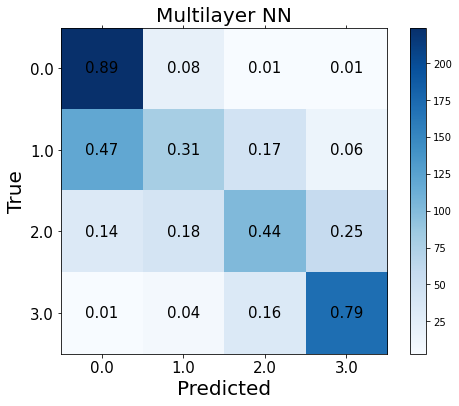

In [14]:
plot_confusion_matrix( np.array([ y for x_b, y_b in test for y in y_b ]), np.argmax(fiducial.predict( test ), axis=-1))

#### 2.Just CDM and SIDM 1.

In [ ]:
train, test = get_tf_DataSet(augment_data=True, channels=['total','stellar'],simulationNames=['CDM','SIDM1'])
dataset_to_numpy = list(train.as_numpy_iterator())
inputShape = dataset_to_numpy[0][0].shape[1:]
fiducial = simpleCNN.getModel(inputShape, train.num_classes, nAttributes=0)
epochs=40
au_history = fiducial.fit(
  x=train,
    validation_data=test,
  epochs=epochs
)

#### 3. Just CDM and SIDM0.1 

In [1]:
train, test = get_tf_DataSet(augment_data=True, channels=['total','stellar'],simulationNames=['CDM','SIDM0.1'])
dataset_to_numpy = list(train.as_numpy_iterator())
inputShape = dataset_to_numpy[0][0].shape[1:]
fiducial = simpleCNN.getModel(inputShape, train.num_classes, nAttributes=0)
epochs=20
au_history = fiducial.fit(
  x=train,
    validation_data=test,
  epochs=epochs
)

NameError: name 'get_tf_DataSet' is not defined

In [4]:
train, test = get_tf_DataSet( augment_data=True, channels=['total','stellar','xray'], 
                             correlations=[['total','stellar'],['total','xray'],['xray','stellar']],
                            attributes=['redshift','mass'],simulationNames=['CDM','SIDM0.1'])
dataset_to_numpy = list(train.as_numpy_iterator())
inputShape = dataset_to_numpy[0][0][0].shape[1:]
add_all = simpleCNN.getModel(inputShape, train.num_classes, nAttributes=2)
epochs=20
au_history = add_all.fit(
  x=train,
    validation_data=test,
  epochs=epochs
)

100%|██████████████████████████████████████| 2400/2400 [07:59<00:00,  5.01it/s]


Epoch 1/20
60/60 [==============================] - 8s 103ms/step - loss: 0.6966 - accuracy: 0.5286 - val_loss: 0.6727 - val_accuracy: 0.6075
Epoch 2/20
60/60 [==============================] - 6s 93ms/step - loss: 0.6651 - accuracy: 0.6078 - val_loss: 0.6849 - val_accuracy: 0.5511
Epoch 3/20
60/60 [==============================] - 6s 93ms/step - loss: 0.6506 - accuracy: 0.6292 - val_loss: 0.6592 - val_accuracy: 0.6138
Epoch 4/20
60/60 [==============================] - 6s 93ms/step - loss: 0.6381 - accuracy: 0.6495 - val_loss: 0.6274 - val_accuracy: 0.6555
Epoch 5/20
60/60 [==============================] - 6s 93ms/step - loss: 0.6224 - accuracy: 0.6521 - val_loss: 0.6079 - val_accuracy: 0.6743
Epoch 6/20
60/60 [==============================] - 6s 93ms/step - loss: 0.6071 - accuracy: 0.6651 - val_loss: 0.5954 - val_accuracy: 0.6952
Epoch 7/20
60/60 [==============================] - 6s 94ms/step - loss: 0.6053 - accuracy: 0.6682 - val_loss: 0.5915 - val_accuracy: 0.6994
Epoch 8/20
6

15/15 [==============================] - 0s 22ms/step


/data2/harvey/tensorflow/examples/tools.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels, size = 15)
/data2/harvey/tensorflow/examples/tools.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels, size = 15)


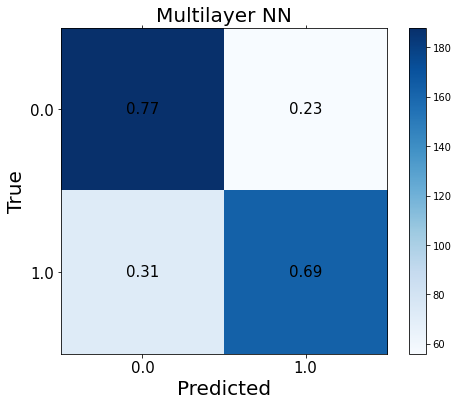

In [8]:
plot_confusion_matrix( np.array([ y for x_b, y_b in test for y in y_b ]), np.argmax(add_all.predict( test ), axis=-1))

#### Results

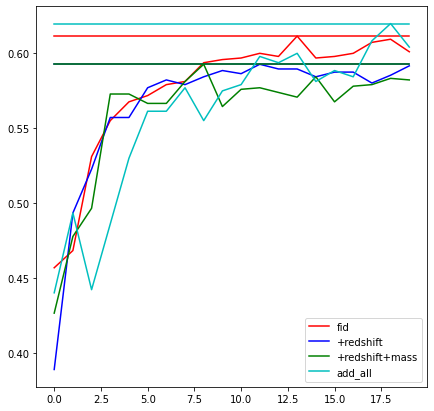

In [24]:
plt.figure(figsize=(7,7))

models = [ fiducial,  add_redshift, add_redshift_mass,add_all]
names = ['fid','+redshift','+redshift+mass','add_all']
c = ['r','b','g','c','y','k']
for i, iModel in enumerate(models):
    plt.plot(iModel.history.epoch, iModel.history.history['val_accuracy'], label=names[i], c=c[i])
    plt.plot(iModel.history.epoch, [np.max(iModel.history.history['val_accuracy'])]*len(iModel.history.epoch), c=c[i])

plt.legend()

### The old way that i did itattributes=

In [ ]:
color=['r','g','b','c']

#Test the momentum on reliability

csv_file = 'pickles/addRedshift.csv'
model_file =  'pickles/addRedshift.h5'
    

previousEpochs = np.loadtxt( csv_file, delimiter=',',skiprows=1 )
model = models.load_model(model_file)

trainHistory = np.loadtxt( csv_file, delimiter=',', 
                    dtype=[('epoch', object), ('accuracy', float), 
                    ('loss', float), ('val_accuracy',float),('val_loss', float)], skiprows=1)
     
plt.plot(trainHistory['accuracy'], label='accuracy', color=color[0])
plt.plot(trainHistory['val_accuracy'], label = 'Redshift', linestyle='--', color=color[0]) 
    
    

csv_file =  'pickles/globalAvPool.csv'
trainHistory = np.loadtxt( csv_file, delimiter=',', 
                    dtype=[('epoch', object), ('accuracy', float), 
                    ('loss', float), ('val_accuracy',float),('val_loss', float)], skiprows=1)
     
plt.plot(trainHistory['accuracy'], label='accuracy', color=color[1])
plt.plot(trainHistory['val_accuracy'], label = 'MaxPool', linestyle='--', color=color[1]) 

plt.legend()





In [ ]:
attributes = []
(train_images, train_att, train_labels), testSets = \
        getData(  indexFileRoot='pickles/testIndexesAttNone', testTrainSplit=0.15, attributes=attributes)
test_labels, test_images, test_att = None, None, None
for i in testSets.keys():
    iAtt = np.array([ testSets[i][j] for j in attributes]).T
    #iAtt =  testSets[i]['redshift']
    if test_labels is None:
        test_images = testSets[i]['images']
        test_labels = testSets[i]['labels']
        test_att = iAtt
    else:
        test_labels = np.vstack((test_labels, testSets[i]['labels']))
        test_images = np.vstack((test_images, testSets[i]['images']))
        test_att = np.vstack((test_att, iAtt))
        
nClasses = len(np.unique(train_labels))
inputShape = train_images.shape[1:]
nAttributes = 0 #train_att.shape[1]

color=['r','g','b','c']

#Test the momentum on reliability
print("LABELS ARE ",np.unique(test_labels))
csv_file = 'pickles/addAttributesNone.csv'
csv_logger = CSVLogger(csv_file, append=True)
model_file =  'pickles/addAttributesNone.h5'

if os.path.isfile( csv_file ):
    previousEpochs = np.loadtxt( csv_file, delimiter=',',skiprows=1 )
    initial_epoch = previousEpochs.shape[0]
else:
    initial_epoch = 0
        
if os.path.isfile(model_file):
    print("FOUND PREVIOUS MODEL, LOADING...")
    model = models.load_model(model_file)
else:
    model = simpleCNN.getModel( inputShape, nClasses, nAttributes=nAttributes, \
                               momentum=0.9, finalLayer=256)
    
history = model.fit(train_images, train_labels, epochs=15, 
                    initial_epoch=initial_epoch,
                    validation_data=(test_images, test_labels),
                       callbacks=csv_logger)
    
model.save(model_file)
trainHistory = np.loadtxt( csv_file, delimiter=',', 
                    dtype=[('epoch', object), ('accuracy', float), 
                    ('loss', float), ('val_accuracy',float),('val_loss', float)], skiprows=1)
     
plt.plot(trainHistory['accuracy'], label='Accuracy', color=color[0])
plt.plot(trainHistory['val_accuracy'], label = 'Fiducial Validation', linestyle='--', color=color[0]) 
    
    
plt.legend()


In [ ]:
trainingSet, testSet = \
        getData(testTrainSplit=0.15,  \
                indexFileRoot='pickles/testIndexes', \
                    nChannels=1)
                   
#augmentedTrain = augmentData( trainingSet )   
nClasses = len(np.unique(trainingSet['label']))
inputShape = trainingSet['images'].shape[1:]
color=['r','g','b','c']


In [ ]:
trainingSet.keys()

In [ ]:
inputShape = trainingSet['images'].shape[1:]

In [ ]:
inputShape

In [ ]:
plt.hist(augmentedTrain['label'])

In [ ]:
attributes = []
nAttributes = len(attributes) #train_att.shape[1]

csv_file = 'pickles/addAttributesNoneSGD_aug.csv'
csv_logger = CSVLogger(csv_file, append=True)
model_file =  'pickles/addAttributesNoneSGD_aug.h5'

if os.path.isfile( csv_file ):
    previousEpochs = np.loadtxt( csv_file, delimiter=',',skiprows=1 )
    initial_epoch = previousEpochs.shape[0]
else:
    initial_epoch = 0
        
if os.path.isfile(model_file):
    print("FOUND PREVIOUS MODEL, LOADING...")
    model = models.load_model(model_file)
else:
    model = simpleCNN.getModel( inputShape, nClasses, nAttributes=nAttributes, \
                               momentum=0.9, finalLayer=256, learning_rate=1e-4)
model.summary()  


inputLayerAtts = np.array([  augmentedTrain[iKey] for iKey in attributes ]).T
testLayerAtts = np.array([ testSet[iKey] for iKey in attributes ])

history = model.fit( augmentedTrain['images'], augmentedTrain['label'], epochs=40, 
                    initial_epoch=initial_epoch,
                    validation_data=(testSet['images'], testSet['label']),
                       callbacks=csv_logger)
    
    
model.save(model_file)


color=['r','g','b','c']

trainHistory = np.loadtxt( csv_file, delimiter=',', 
                    dtype=[('epoch', object), ('accuracy', float), 
                    ('loss', float), ('val_accuracy',float),('val_loss', float)], skiprows=1)
     
plt.plot(trainHistory['accuracy'], label='accuracy', color=color[0])
plt.plot(trainHistory['val_accuracy'], label = 'Redshift attribute with Max Pool', linestyle='--', color=color[0]) 
    
    

csv_file = 'pickles/addAttributesNoneSGD.csv'
trainHistory = np.loadtxt( csv_file, delimiter=',', 
                    dtype=[('epoch', object), ('accuracy', float), 
                    ('loss', float), ('val_accuracy',float),('val_loss', float)], skiprows=1)
     
plt.plot(trainHistory['accuracy'], label='accuracy', color=color[1])
plt.plot(trainHistory['val_accuracy'], label = 'Fiducial', linestyle='--', color=color[1]) 

plt.legend()


In [ ]:
attributes = ['mass']
nAttributes = len(attribute) #train_att.shape[1]


#Test the momentum on reliability
print("LABELS ARE ",np.unique(test_labels))

attributes = []
nAttributes = len(attributes)


csv_file = 'pickles/addAttributesMassSGD.csv'
csv_logger = CSVLogger(csv_file, append=True)
model_file =  'pickles/addAttributesMassSGD.h5'

if os.path.isfile( csv_file ):
    previousEpochs = np.loadtxt( csv_file, delimiter=',',skiprows=1 )
    initial_epoch = previousEpochs.shape[0]
else:
    initial_epoch = 0
        
if os.path.isfile(model_file):
    print("FOUND PREVIOUS MODEL, LOADING...")
    model = models.load_model(model_file)
else:
    model = simpleCNN.getModel( inputShape, nClasses, nAttributes=nAttributes, \
                               momentum=0.9, finalLayer=256, learning_rate=1e-4)
model.summary()  


inputLayerAtts = np.array([  augmentedTrain[iKey] for iKey in attributes ]).T
testLayerAtts = np.array([ testSet[iKey] for iKey in attributes ])

history = model.fit( [augmentedTrain['images'], inputLayerAtts], augmentedTrain['label'], epochs=40, 
                    initial_epoch=initial_epoch,
                    validation_data=([testSet['images'], testLayerAtts], testSet['label']),
                       callbacks=csv_logger)
    
    
model.save(model_file)


color=['r','g','b','c']

trainHistory = np.loadtxt( csv_file, delimiter=',', 
                    dtype=[('epoch', object), ('accuracy', float), 
                    ('loss', float), ('val_accuracy',float),('val_loss', float)], skiprows=1)
     
plt.plot(trainHistory['accuracy'], label='accuracy', color=color[0])
plt.plot(trainHistory['val_accuracy'], label = 'Redshift attribute with Max Pool', linestyle='--', color=color[0]) 
    
    

csv_file = 'pickles/addAttributesNoneSGD.csv'
trainHistory = np.loadtxt( csv_file, delimiter=',', 
                    dtype=[('epoch', object), ('accuracy', float), 
                    ('loss', float), ('val_accuracy',float),('val_loss', float)], skiprows=1)
     
plt.plot(trainHistory['accuracy'], label='accuracy', color=color[1])
plt.plot(trainHistory['val_accuracy'], label = 'Fiducial', linestyle='--', color=color[1]) 

plt.legend()


In [ ]:
attributes = ['mass','redshift']
nAttributes = len(attribute) #train_att.shape[1]


#Test the momentum on reliability
print("LABELS ARE ",np.unique(test_labels))

attributes = []
nAttributes = len(attributes)


csv_file = 'pickles/addAttributesMassRedshiftSGD.csv'
csv_logger = CSVLogger(csv_file, append=True)
model_file =  'pickles/addAttributesMassRedshiftSGD.h5'

if os.path.isfile( csv_file ):
    previousEpochs = np.loadtxt( csv_file, delimiter=',',skiprows=1 )
    initial_epoch = previousEpochs.shape[0]
else:
    initial_epoch = 0
        
if os.path.isfile(model_file):
    print("FOUND PREVIOUS MODEL, LOADING...")
    model = models.load_model(model_file)
else:
    model = simpleCNN.getModel( inputShape, nClasses, nAttributes=nAttributes, \
                               momentum=0.9, finalLayer=256, learning_rate=1e-4)
model.summary()  


inputLayerAtts = np.array([  augmentedTrain[iKey] for iKey in attributes ]).T
testLayerAtts = np.array([ testSet[iKey] for iKey in attributes ])

history = model.fit( [augmentedTrain['images'], inputLayerAtts], augmentedTrain['label'], epochs=40, 
                    initial_epoch=initial_epoch,
                    validation_data=([testSet['images'], testLayerAtts], testSet['label']),
                       callbacks=csv_logger)
    
    
model.save(model_file)


color=['r','g','b','c']

trainHistory = np.loadtxt( csv_file, delimiter=',', 
                    dtype=[('epoch', object), ('accuracy', float), 
                    ('loss', float), ('val_accuracy',float),('val_loss', float)], skiprows=1)
     
plt.plot(trainHistory['accuracy'], label='accuracy', color=color[0])
plt.plot(trainHistory['val_accuracy'], label = 'Redshift attribute with Max Pool', linestyle='--', color=color[0]) 
    
    

csv_file = 'pickles/addAttributesNoneSGD.csv'
trainHistory = np.loadtxt( csv_file, delimiter=',', 
                    dtype=[('epoch', object), ('accuracy', float), 
                    ('loss', float), ('val_accuracy',float),('val_loss', float)], skiprows=1)
     
plt.plot(trainHistory['accuracy'], label='accuracy', color=color[1])
plt.plot(trainHistory['val_accuracy'], label = 'Fiducial', linestyle='--', color=color[1]) 

plt.legend()


In [ ]:
plt.imshow(tf.math.confusion_matrix(prediction,test_labels ))

In [ ]:
attributes = ['redshift']
nAttributes = len(attributes)


csv_file = 'pickles/addAttributesZ_SGD_maxPool_aug.csv'
csv_logger = CSVLogger(csv_file, append=True)
model_file =  'pickles/addAttributesZ_SGD_maxPool_aug.h5'

if os.path.isfile( csv_file ):
    previousEpochs = np.loadtxt( csv_file, delimiter=',',skiprows=1 )
    initial_epoch = previousEpochs.shape[0]
else:
    initial_epoch = 0
        
if os.path.isfile(model_file):
    print("FOUND PREVIOUS MODEL, LOADING...")
    model = models.load_model(model_file)
else:
    model = simpleCNN.getModel( inputShape, nClasses, nAttributes=nAttributes, \
                               momentum=0.9, finalLayer=256, learning_rate=1e-4)
model.summary()  


inputLayerAtts = np.array([  augmentedTrain[iKey] for iKey in attributes ]).T
testLayerAtts = np.array([ testSet[iKey] for iKey in attributes ]).T

history = model.fit( [augmentedTrain['images'], inputLayerAtts], augmentedTrain['label'], epochs=40, 
                    initial_epoch=initial_epoch,
                    validation_data=([testSet['images'], testLayerAtts], testSet['label']),
                       callbacks=csv_logger)
    
    
model.save(model_file)


color=['r','g','b','c']

trainHistory = np.loadtxt( csv_file, delimiter=',', 
                    dtype=[('epoch', object), ('accuracy', float), 
                    ('loss', float), ('val_accuracy',float),('val_loss', float)], skiprows=1)
     
plt.plot(trainHistory['accuracy'], label='accuracy', color=color[0])
plt.plot(trainHistory['val_accuracy'], label = 'Redshift attribute with Max Pool', linestyle='--', color=color[0]) 
    
    

csv_file = 'pickles/addAttributesNoneSGD.csv'
trainHistory = np.loadtxt( csv_file, delimiter=',', 
                    dtype=[('epoch', object), ('accuracy', float), 
                    ('loss', float), ('val_accuracy',float),('val_loss', float)], skiprows=1)
     
plt.plot(trainHistory['accuracy'], label='accuracy', color=color[1])
plt.plot(trainHistory['val_accuracy'], label = 'Fiducial', linestyle='--', color=color[1]) 

plt.legend()


In [ ]:
attributes = ['redshift']
(train_images, train_att, train_labels), testSets = \
        getData(  indexFileRoot='pickles/testIndexes', \
                testTrainSplit=0.15, attributes=attributes)
test_labels, test_images, test_att = None, None, None
for i in testSets.keys():
    iAtt = np.array([ testSets[i][j] for j in attributes]).T
    #iAtt =  testSets[i]['redshift']
    if test_labels is None:
        test_images = testSets[i]['images']
        test_labels = testSets[i]['labels']
        test_att = iAtt
    else:
        test_labels = np.vstack((test_labels, testSets[i]['labels']))
        test_images = np.vstack((test_images, testSets[i]['images']))
        test_att = np.vstack((test_att, iAtt))
        
nClasses = len(np.unique(train_labels))
inputShape = train_images.shape[1:]
nAttributes = train_att.shape[1]

color=['r','g','b','c']

#Test the momentum on reliability
print("LABELS ARE ",np.unique(test_labels))
csv_file = 'pickles/addAttributesZ_SGD_maxPool_2.csv'
csv_logger = CSVLogger(csv_file, append=True)
model_file =  'pickles/addAttributesZ_SGD_maxPool_2.h5'

if os.path.isfile( csv_file ):
    previousEpochs = np.loadtxt( csv_file, delimiter=',',skiprows=1 )
    initial_epoch = previousEpochs.shape[0]
else:
    initial_epoch = 0
        
if os.path.isfile(model_file):
    print("FOUND PREVIOUS MODEL, LOADING...")
    model = models.load_model(model_file)
else:
    model = simpleCNN.getModel( inputShape, nClasses, nAttributes=nAttributes, \
                               momentum=0.9, finalLayer=256, learning_rate=1e-4)
model.summary()  
history = model.fit([train_images, train_att], train_labels, epochs=40, 
                    initial_epoch=initial_epoch,
                    validation_data=([test_images, test_att], test_labels),
                       callbacks=csv_logger)
    
model.save(model_file)
trainHistory = np.loadtxt( csv_file, delimiter=',', 
                    dtype=[('epoch', object), ('accuracy', float), 
                    ('loss', float), ('val_accuracy',float),('val_loss', float)], skiprows=1)
     
plt.plot(trainHistory['accuracy'], label='accuracy', color=color[0])
plt.plot(trainHistory['val_accuracy'], label = 'Redshift attribute with Max Pool', linestyle='--', color=color[0]) 
    
    

csv_file = 'pickles/addAttributesNoneSGD.csv'
trainHistory = np.loadtxt( csv_file, delimiter=',', 
                    dtype=[('epoch', object), ('accuracy', float), 
                    ('loss', float), ('val_accuracy',float),('val_loss', float)], skiprows=1)
     
plt.plot(trainHistory['accuracy'], label='accuracy', color=color[1])
plt.plot(trainHistory['val_accuracy'], label = 'Fiducial', linestyle='--', color=color[1]) 

plt.legend()


In [ ]:
model.layers[12].pool_size

In [ ]:
all_csv_files = ['pickles/addAttributesNoneSGD.csv', \
            'pickles/addAttributesZ_SGD.csv',\
            'pickles/addAttributesMassSGD.csv',\
            'pickles/addAttributesMassRedshift.csv',\
            'pickles/addAttributesZ_SGD_maxPool.csv',
                'pickles/addAttributesZ_SGD_maxPool_4.csv']
colors = ['r','b','g','c','k','yellow']
for i, csv_file in enumerate(all_csv_files):
    
    trainHistory = np.loadtxt( csv_file, delimiter=',', 
                    dtype=[('epoch', object), ('accuracy', float), 
                    ('loss', float), ('val_accuracy',float),('val_loss', float)], skiprows=1)
     
    #plt.plot(trainHistory['accuracy'], label='accuracy', color=color[1],
    #        colo)
    plt.plot(trainHistory['val_accuracy'], label = csv_file.split('/')[1], \
             linestyle='--', color=colors[i]) 

plt.legend()


In [ ]:
model_file =  models.load_model('pickles/addAttributesZ_SGD_maxPool.h5')
new_model_file =  models.load_model('pickles/addAttributesZ_SGD_maxPool_2.h5')

In [ ]:
model_file.summary()
new_model_file.summary()